<a href="https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **-1-**
## **Analytic Approach to Project Management of PCB Designs**


---



This is a [Python programming language](https://www.python.org/) set of executable code cells on [google colabatory notebook](https://colab.research.google.com/).  
A colab notebook has cells that run snippets of code. 

Yes, this notebook runs real code! <br>  Plug in your own variables and see how it works for your situation.<br>  Use it, modify it,  note: the usual and customary restrictions apply. <br> 
If you are getting unexpected results try the following: <br>


1.   Refresh notebook and re-run each cell in sequence.  "" This is a script"
2.   If the previous step doesn't work-  it could be because notebook has been altered from origional.     [Reload new copy to go back to starting point](https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb). 



It is my intention that this notebook be curated by a cookbook of good ideas related to project management of data analysis recipes that can be applied to the practice of PCB development. 


This is a Google Colab Notebook to explore a project for the Road Runner Service Bureau<br>
![alt text](https://i.pinimg.com/564x/44/f9/b2/44f9b244eb21814faec6bef4c82c2023.jpg)


# **- 2 -**
## **Enviroment setup to read and analyze data**

Running the code cell after this will import the following libraries that will be used.

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data.   For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.  It's easy to use with google colab! 

[Seaborn:](https://seaborn.pydata.org/)  The seaborn package was developed based on the Matplotlib library. It is used to create more attractive and informative statistical graphics.

 [Parser](https://dateutil.readthedocs.io/en/stable/parser.html) from the dateutil library converts text like  1-Jan-2019 to a datetime object that enables dates to be analyzed. 

[Bokeh](https://bokeh.pydata.org/) is an interactive visualization library that targets modern web browsers for presentation. 

In [0]:
import pandas as pd  #import the pandas module and shorten to pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn; seaborn.set()


from dateutil import parser

from bokeh.io import show, output_notebook
from bokeh.palettes import PuBu4
from bokeh.plotting import figure
from bokeh.models import Label



# Setup functions to be used. 

Functions are code blocks that can be defined and reused

In [0]:
def int2dollar(number):
  ''' function that takes a number (float or integer) 
  and returns a currency string rounded up to the nearest dollar'''
  
  return f'${number:,.0f}'

In [88]:
int2dollar(12458329.59)

'$12,458,330'

# **- 3 -**
## **The agreement**


Let's set the budget and schedule parameters for this analysis.  These are variables that we can enter once and re-use. 

In [0]:
#@title Use this form to enter Key Agreement Details

project_name = 'ABC_CPU_Motherboard' #@param {type:"string"}
schedule = '2017-01-10' #@param {type:"date"}
budget = 9000 #@param {type:"number"}
regular_rate = 50.0 #@param {type:"number"}
overtime_rate = 75.0 #@param {type:"number"}



In [90]:
#any of the key agreement variables can be printed to check
print(project_name, schedule, budget)

ABC_CPU_Motherboard 2017-01-10 9000


For this exercise there is a csv file you can download from my git hub account.   We will create a variable and assign the path location of the csv file on github.

In [0]:
#assign variable link that points to copy of csv data
link = 'https://raw.githubusercontent.com/timothylombard/RSB/master/RSBdata.csv' #variable link now points to copy of csv data

In [0]:
df = pd.read_csv(link)   # Create a pandas dataframe from the data assigned to the link variable. 

In [93]:
print(df[['Date', 'Placed', 'Total Components']])# Print out the contents of the dataframe 

         Date  Placed  Total Components
0  2017-01-01       0              2946
1  2017-01-04    1432              2946
2  2017-01-07    2946              2946
3  2017-01-10    2946              2946
4  2017-01-13    2247              3588
5  2017-01-16    3588              3588
6  2017-01-18    3588              3588


In [94]:
list(df) #list the column names

['Date',
 'Placed',
 'Total Components',
 'Connections',
 'Connected',
 'DRC Errors',
 'Reg Hours',
 'OT Hours']

# -4- Calculated Columns 







### 4.1 $Percent Placed = \frac{parts Placed}{TotalComponentCount}$

In [95]:
# add a new calculated column for the percentage placed 
df['pctPlaced'] = df['Placed']/df['Total Components']
list(df) #list the column names


['Date',
 'Placed',
 'Total Components',
 'Connections',
 'Connected',
 'DRC Errors',
 'Reg Hours',
 'OT Hours',
 'pctPlaced']

### 4.2 $Percent Connected = \frac{Connected}{Connections}$

In [96]:
# add a new calculated column for the percentage connected 
df['pctConn'] = df['Connected']/df['Connections']
list(df) #list the column names

['Date',
 'Placed',
 'Total Components',
 'Connections',
 'Connected',
 'DRC Errors',
 'Reg Hours',
 'OT Hours',
 'pctPlaced',
 'pctConn']

In [97]:
#Print out the new columns 
print(df[['pctPlaced','pctConn']])

   pctPlaced   pctConn
0   0.000000  0.000000
1   0.486083  0.021453
2   1.000000  0.858158
3   1.000000  1.000000
4   0.626254  0.584761
5   1.000000  0.890489
6   1.000000  1.000000


Let's make our first plot! 

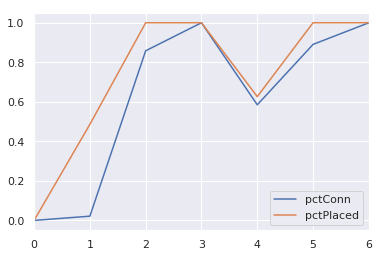

In [98]:
df[['pctConn','pctPlaced']].plot();

Notice the Y axis is in percentage complete but the X axis is an interger.   It would be more helpful if the X axis was a date rather than a sequence. 
To plot progess over time the data in the "Date" column needs to be converted into datetime format.

In [99]:
#Convert the datatype of the Date column from a string to a datetime 
df['Date'] =  pd.to_datetime(df['Date'])
print(df)

        Date  Placed  Total Components  ...  OT Hours  pctPlaced   pctConn
0 2017-01-01       0              2946  ...         0   0.000000  0.000000
1 2017-01-04    1432              2946  ...         0   0.486083  0.021453
2 2017-01-07    2946              2946  ...        18   1.000000  0.858158
3 2017-01-10    2946              2946  ...         0   1.000000  1.000000
4 2017-01-13    2247              3588  ...         4   0.626254  0.584761
5 2017-01-16    3588              3588  ...         8   1.000000  0.890489
6 2017-01-18    3588              3588  ...         4   1.000000  1.000000

[7 rows x 10 columns]


This data frame has an index just to the left of the Date column [0-6],   Lets use the Date column as the index with the command below.

In [0]:
df.set_index('Date', inplace=True) #update the index to use the  the Date column to be index

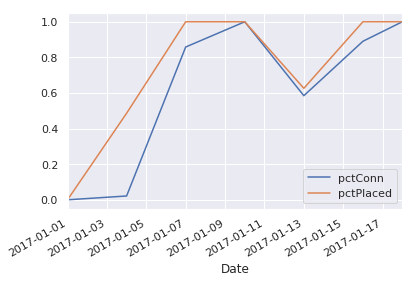

In [101]:
df[['pctConn','pctPlaced']].plot();

# -6- Budget Calculations

First, lets create another calculated field for  Running Total  of the regular hours as time goes on.

In [0]:
df['regrunning'] = df['Reg Hours'].cumsum()


In [103]:
print(df['regrunning'])

Date
2017-01-01     12
2017-01-04     60
2017-01-07    108
2017-01-10    138
2017-01-13    176
2017-01-16    216
2017-01-18    232
Name: regrunning, dtype: int64


Now let's create another calculated field for the running total  this time for overtime hours 

In [0]:
df['otrunning'] = df['OT Hours'].cumsum()

In [105]:
df[['OT Hours', 'otrunning']] #print the OT Hours and otrunning columns

,OT Hours,otrunning
Date,,
2017-01-01,0,0
2017-01-04,0,0
2017-01-07,18,18
2017-01-10,0,18
2017-01-13,4,22
2017-01-16,8,30
2017-01-18,4,34


**Remember the Agreement parameters?   Let's use some of those to determine how much of the budget we are spending**

Let's create another column named "spend"  

In [0]:
df['spend'] = df['regrunning']*regular_rate + df['otrunning']*overtime_rate


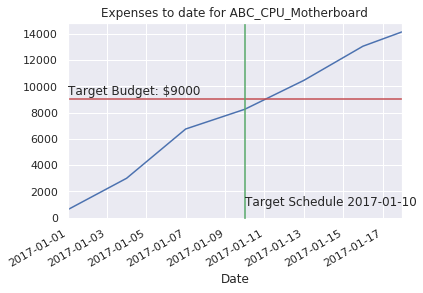

In [107]:

df['spend'].plot()
#add reference line showing budget target
plt.axhline(y=budget, color='r', linestyle='-')
text(x=df.index.min(), y=budget+budget/25, s="Target Budget: $"+str(budget))

#add reference line showing schedule target
plt.axvline(x=schedule, color='g', linestyle='-')
text(x=schedule, y=budget*.1, s="Target Schedule "+str(schedule))

plt.title('Expenses to date for '+project_name);


# -7- Time Calculations
 ##Count the number of days 

In [108]:
from datetime import date

s_date = date(2019,1,1)
e_date = date.today()

print(e_date - s_date)

216 days, 0:00:00


In [109]:

agreement_date = parser.parse(schedule)
days_worked = df.index.max() - df.index.min()
print(days_worked.days)

17


In [0]:
days4job = agreement_date - df.index.min()


In [111]:
days4job.days

9

# - 8 -  Recipe: High infomation bullet graph for Schedule

Note:  A Bullet Graph visualizes a performance metric compared to a target

In [0]:
from bokeh.io import show, output_notebook
from bokeh.palettes import PuBu4
from bokeh.plotting import figure
from bokeh.models import Label


In [113]:

data = [(project_name, days4job.days, days_worked.days)]
limits = [0, days4job.days, days4job.days *2, days4job.days *3]
labels = ["OK", "Late", "Very Late"]
cats = [x[0] for x in data]
print(data, limits, labels, cats)

[('ABC_CPU_Motherboard', 9, 17)] [0, 9, 18, 27] ['OK', 'Late', 'Very Late'] ['ABC_CPU_Motherboard']


In [0]:
if days4job.days > days_worked.days:
  status = str(days4job.days - days_worked.days)+" days remaining"
else:
  status = str(days_worked.days - days4job.days)+" days past due"
  
              
sch_pct = f'{days_worked.days/days4job.days*100:.2f}' +"% "  

p=figure(
    title=sch_pct +"Day "+str(days_worked.days)+" on a "+str(days4job.days)+" day project: "+status, 
    plot_height=125, 
    plot_width=700, 
    y_range=cats,
    toolbar_location=None,
)
p.x_range.range_padding = 0
p.grid.grid_line_color = None
p.xaxis[0].ticker.num_minor_ticks = 0


In [115]:
for left, right, color in zip(limits[:-1], limits[1:], PuBu4[::-1]):
    p.hbar(y=cats, left=left, right=right, height=0.8, color=color)
    
output_notebook()
show(p)

Loading BokehJS ...

In [116]:
perf = [x[2] for x in data]
p.hbar(y=cats, left=0, right=perf, height=0.3, color="gray")

output_notebook()
show(p)

Loading BokehJS ...

In [117]:
comp = [x[1]for x in data]
p.segment(x0=comp, y0=[(x, -0.5) for x in cats], x1=comp,
          y1=[(x, 0.5) for x in cats], color="Green", line_width=2)

output_notebook()
show(p)

Loading BokehJS ...

In [118]:
for start, label in zip(limits[:-1], labels):
    p.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))
    
    
p.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))    
output_notebook()
show(p)


Loading BokehJS ...

In [119]:
citation = Label(x=days4job.days, y=50,  y_units='screen',
                 text_font_size="8pt", text= "Target: "+schedule, render_mode='css', x_offset=5)

p.add_layout(citation)

output_notebook()
show(p)

Loading BokehJS ...

# - 9 -  Recipe: High infomation bullet graph for Budget

### Get the latest stats
###To get the latest statistic from our dataframe we can use the index.max() function

In [120]:
df.index.max()

Timestamp('2017-01-18 00:00:00')

In [121]:
spend2date = df.loc[df.index.max(),'spend']
print(spend2date)

14150.0


Earlier we created a function- int2dollar    This function takes a number as input and returns a currency string. 
Let's test it out on the spend2dat variable we just created. Let's try it on the spend2date variable

In [122]:
int2dollar(spend2date)

'$14,150'

## Setup base graphic  for spend bullet graph

In [123]:
b_data = [(project_name, budget, spend2date)]
b_limits = [0, budget, budget *2, budget *3]
b_labels = ["OK", "Over Budget", "Way Over Budget"]
b_cats = [x[0] for x in data]
print(b_data, b_limits, b_labels, b_cats)

[('ABC_CPU_Motherboard', 9000, 14150.0)] [0, 9000, 18000, 27000] ['OK', 'Over Budget', 'Way Over Budget'] ['ABC_CPU_Motherboard']


In [124]:
if budget > spend2date:
  b_status = int2dollar(budget - spend2date)+" budget remaining"
else:
  b_status = int2dollar(spend2date - budget)+" over target"
  
              
budget_pct = f'{spend2date/budget*100:.2f}' +"% "  

bp=figure(
    title=int2dollar(spend2date) +" ("+budget_pct+") spent on a "+int2dollar(budget)+" budget target project: "+b_status, 
    plot_height=125, 
    plot_width=700,  
    y_range=b_cats,
    toolbar_location=None,
)
bp.x_range.range_padding = 0
bp.grid.grid_line_color = None
bp.xaxis[0].ticker.num_minor_ticks = 0


for left, right, color in zip(b_limits[:-1], b_limits[1:], PuBu4[::-1]):
    bp.hbar(y=b_cats, left=left, right=right, height=0.8, color=color)
    
    
b_perf = [x[2] for x in b_data]
bp.hbar(y=b_cats, left=0, right=b_perf, height=0.3, color="gray")

b_comp = [x[1]for x in b_data]
bp.segment(x0=b_comp, y0=[(x, -0.5) for x in b_cats], x1=b_comp,
          y1=[(x, 0.5) for x in b_cats], color="Green", line_width=2)

for start, label in zip(b_limits[:-1], b_labels):
    bp.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))
    
    
bp.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15)) 
    

output_notebook()
show(bp)

Loading BokehJS ...